In [ ]:
!git clone https://github.com/NVIDIA/apex
!cd apex && pip install -v --disable-pip-version-check --no-cache-dir ./
!pip install -r requirements.txt
!pip uninstall -yq scipy
!pip install fvcore scipy==1.1.0 deprecated 
!pip install numpy  youtube_dl pafy natsort blend_modes

In [2]:
!git clone https://github.com/sabarim/3DC-Seg.git
%cd 3DC-Seg 
!export PYTHONPATH=$(pwd):$PYTHONPATH
!wget https://omnomnom.vision.rwth-aachen.de/data/3DC-Seg/models/bmvc_final.pth
!ls
!mkdir -p ./saved_models/csn/ 
!cd ./saved_models/csn/ && wget https://omnomnom.vision.rwth-aachen.de/data/3DC-Seg/models/csn.zip ; unzip -fq ./csn.zip

fatal: destination path '3DC-Seg' already exists and is not an empty directory.
/content/3DC-Seg
/bin/bash: whet: command not found
apex						 loss		   run_configs
config						 main.py	   run_scripts
csn.zip						 network	   saved_models
datasets					 __pycache__	   util.py
inference_handlers				 README.md	   utils
irCSN_152_ft_kinetics_from_ig65m_f126851907.pth  requirements.txt
fatal: destination path 'apex' already exists and is not an empty directory.
Created temporary directory: /tmp/pip-ephem-wheel-cache-ynjr9kb9
Created temporary directory: /tmp/pip-req-tracker-a3or36ku
Created requirements tracker '/tmp/pip-req-tracker-a3or36ku'
Created temporary directory: /tmp/pip-install-rcux1f4o
Processing /content/3DC-Seg/apex
  Created temporary directory: /tmp/pip-req-build-0ycik62w
  Added file:///content/3DC-Seg/apex to build tracker '/tmp/pip-req-tracker-a3or36ku'
    Running setup.py (path:/tmp/pip-req-build-0ycik62w/setup.py) egg_info for package from file:///content/3DC-Seg/apex
  

In [10]:
!git clone --recursive https://github.com/davisvideochallenge/davis2017-evaluation
!cd davis2017-evaluation && ls && wget https://gist.githubusercontent.com/OlegJakushkin/14c3c8ee56ce5445b18dfe2d300621da/raw/603cf7e23c5074e132f04c681c7e24fa4ec1e557/davis.patch && patch -R -p1 < davis.patch ; python setup.py install

fatal: destination path 'davis2017-evaluation' already exists and is not an empty directory.
davis2017      evaluation_codalab.py	  evaluation_method.py.rej  results
davis.patch    evaluation_method.py	  pytest		    setup.cfg
davis.patch.1  evaluation_method.py.orig  README.md		    setup.py
--2020-12-08 15:14:21--  https://gist.githubusercontent.com/OlegJakushkin/14c3c8ee56ce5445b18dfe2d300621da/raw/603cf7e23c5074e132f04c681c7e24fa4ec1e557/davis.patch
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5697 (5.6K) [text/plain]
Saving to: ‘davis.patch.2’

davis.patch.2       100%[===================>]   5.56K  --.-KB/s    in 0s      

2020-12-08 15:14:21 (66.0 MB/s) - ‘davis.patch.2’ saved [5697/5697]

patching file davis2017/davis.py
patching file davis2017/evalu

In [12]:
!wget https://data.vision.ee.ethz.ch/csergi/share/davis/DAVIS-2017-Unsupervised-trainval-480p.zip
!unzip DAVIS-2017-Unsupervised-trainval-480p.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: DAVIS/JPEGImages/480p/lady-running/00001.jpg  
  inflating: DAVIS/JPEGImages/480p/lady-running/00032.jpg  
  inflating: DAVIS/JPEGImages/480p/lady-running/00030.jpg  
  inflating: DAVIS/JPEGImages/480p/lady-running/00012.jpg  
  inflating: DAVIS/JPEGImages/480p/lady-running/00025.jpg  
  inflating: DAVIS/JPEGImages/480p/lady-running/00063.jpg  
  inflating: DAVIS/JPEGImages/480p/lady-running/00045.jpg  
  inflating: DAVIS/JPEGImages/480p/lady-running/00006.jpg  
  inflating: DAVIS/JPEGImages/480p/lady-running/00029.jpg  
  inflating: DAVIS/JPEGImages/480p/lady-running/00049.jpg  
  inflating: DAVIS/JPEGImages/480p/lady-running/00057.jpg  
  inflating: DAVIS/JPEGImages/480p/lady-running/00035.jpg  
  inflating: DAVIS/JPEGImages/480p/lady-running/00028.jpg  
  inflating: DAVIS/JPEGImages/480p/lady-running/00064.jpg  
  inflating: DAVIS/JPEGImages/480p/lady-running/00054.jpg  
  inflating: DAVIS/JPEGImages/48

In [48]:
#!cp -fr /content/3DC-Seg/DAVIS/ImageSets/2017 /content/3DC-Seg/DAVIS/ImageSets/2016
#!wget https://omnomnom.vision.rwth-aachen.de/data/3DC-Seg/models/bmvc_final.pth
!python main.py -c run_configs/bmvc_final.yaml  --task infer --wts ./bmvc_final.pth

2020-12-08 17:52:54.092454: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Arguments used: Namespace(config='run_configs/bmvc_final.yaml', loadepoch=None, local_rank=0, num_workers=4, pretrained='weights/pwc_net.pth.tar', print_freq=1, show_image_summary=False, task='infer', wts='./bmvc_final.pth')
Dataset parameters ['self', 'num_classes'] are missing in the config file.
Dataset parameters ['self', 'num_classes'] are missing in the config file.
Loading pretrained weights for the backbone from  saved_models/csn/irCSN_152_ft_kinetics_from_ig65m_f126851907.pth...
Freezing batchnorm for Encoder3d
Freezing batchnorm for Encoder3d
Using model: <class 'network.models.SaliencyNetwork'>
devices available: 1
Using port 1230 for torch distributed.
WARN: Optimiser state could not be resumed. Resetting start epoch to 0....
Loaded weights from ./bmvc_final.pth
Selected optimization level O1:  Insert automatic casts around Pytorc

In [54]:
!cp -fr /content/3DC-Seg /content/drive/MyDrive/3DC-Seg

#!cp -fr  /content/drive/MyDrive/3DC-Seg /content/3DC-Seg
#%cd 3DC-Seg 
#!export PYTHONPATH=$(pwd):$PYTHONPATH

In [42]:
!mkdir ./DAVIS/JPEGImages/480p/fish
!mkdir ./DAVIS/Annotations_unsupervised/480p/fish

import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
import numpy
import pafy

base_path = './DAVIS/JPEGImages/480p/fish/'
base_path_an = './DAVIS/Annotations_unsupervised/480p/fish/'
video_url = 'https://www.youtube.com/watch?v=3fycT91TWYA'

def read_video():
    urlPafy  = pafy.new(video_url)
    videoplay   = urlPafy.getbest()
    # open url with opencv
    cap = cv2.VideoCapture(videoplay.url)
    if not cap.isOpened():
        print('video not opened')
        exit(-1)

    frid = 0
    print("Started reading video file")
    while True:
        # read frame
        ret, frame = cap.read()

        if not ret:
            break
        if frid % 50 == 0:
            print(frid)
        #if frid == 101:
        #    break
        
        frame = cv2.resize(frame,(854, 480))
        file_name = '{:05d}'.format(frid) 

        #print(file_name)
        cv2.imwrite(base_path +file_name  + '.jpg', frame)
        frame[:,:,:]=0
        cv2.imwrite(base_path_an +file_name + '.png', frame )
        frid = frid + 1

    
    # release VideoCapture
    print("saving results")
    cap.release()
    print("done")

read_video() 

mkdir: cannot create directory ‘./DAVIS/JPEGImages/480p/fish’: File exists
mkdir: cannot create directory ‘./DAVIS/Annotations_unsupervised/480p/fish’: File exists
Started reading video file
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
saving results
done


In [40]:
!pip install blend_modes

  Created wheel for blend-modes: filename=blend_modes-2.1.0-cp36-none-any.whl size=9547 sha256=8d61f23ad2360f3ac395441b5266ca52cdaa3397fb773a141039b6da587b526c
  Stored in directory: /root/.cache/pip/wheels/95/78/96/f8943447b04c319a6e4a7680df50cc47a70cc5a81657b15494
Successfully built blend-modes


3950


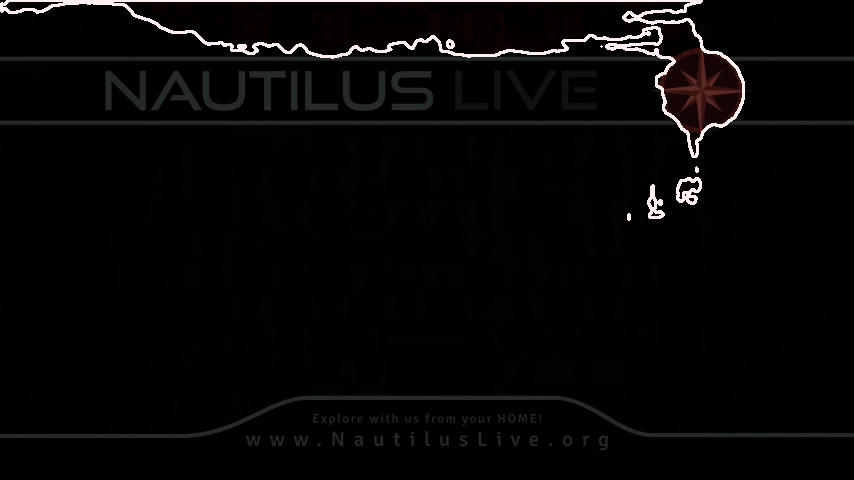

saving results
done


In [77]:
import os
from blend_modes import *
from pathlib import Path
from natsort import natsorted, ns
import shutil
from google.colab.patches import cv2_imshow
from google.colab import output

base_path = './DAVIS/JPEGImages/480p/fish/'
base_output_masks='/content/3DC-Seg/results/bmvc_final/fish/'
target_out_mask_path_base = "/content/drive/MyDrive/fss/w5s1-as_w1s5/query/" + "msk"

def write_video():
    fidx =0
    while os.path.isfile(target_out_mask_path_base + str(fidx)+ ".avi"):
      fidx = fidx + 1
    out_name  = target_out_mask_path_base + str(fidx) + ".avi"
    out_name_tmp  = '/content/' + str(fidx) + ".avi"
    colorwriter = cv2.VideoWriter(out_name_tmp, cv2.VideoWriter_fourcc(*'XVID'), 30, (854, 480), 1)
    frid = 0
    print("Started reading video file")
    dirlist = os.listdir(base_path)
    dirlist = natsorted(dirlist, alg=ns.PATH | ns.IGNORECASE)
    
    for f in dirlist:
        frid = frid + 1
        if frid % 50 ==0:
          output.clear()
          print(frid)
          cv2_imshow(blended)
        n = Path(f).stem
        frame = cv2.imread(base_path+ f)
        mask = cv2.imread(base_output_masks+ n + '.png')

        gray_image = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
        # Apply cv2.threshold() to get a binary image
        ret, thresh = cv2.threshold(gray_image, 1, 255, cv2.THRESH_BINARY)
        
        # Find contours:
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2BGRA).astype(float)
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2BGRA).astype(float)
        opacity = 0.9  # The opacity of the foreground that is blended onto the background is 70 %.
        blended = soft_light(frame, mask, opacity)
        blended = blended.astype(numpy.uint8)  # Convert image to OpenCV native display format
        blended = cv2.cvtColor(blended, cv2.COLOR_BGRA2BGR)
        blended = cv2.drawContours(blended, contours, -1, (240, 240, 255), 2)
        colorwriter.write(blended)

    
    # release VideoCapture
    print("saving results")
    colorwriter.release()
    shutil.copy(out_name_tmp, out_name)
    print("done")


write_video()